# Import Required Libraries#

In [ ]:
#!pip install lifelines

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from keras.layers import Dense
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.svm import SVC as svm
from keras.models import Sequential
from lifelines import KaplanMeierFitter
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from lifelines.statistics import logrank_test
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay

# Data Acquisition#

In [ ]:
client_dataset = pd.read_excel("/content/merged_data_with_company_id.xlsx")

In [ ]:
client_dataset.shape

(3696, 36)

#Data Exploration#

In [ ]:
client_dataset.head()

,company_id,package_official_unlocks_credit,package_official_jobs_credit,package_officical_price,paid_subscription_duration,lifetime_subscription_duration,gold - 1 month access,gold - 1 year access,gold - 3 months access,gold - 6 months access,...,applications_count,application_score_mean,ok_state_count,shortlisted_state_count,rejected_state_count,locked_status_count,unlocked_status_count,activity,last_login_time,target
0,0033766d,800,40,54950,8,24,0,0,0,0,...,28,52,9,5,14,14,14,13,123,0
1,352056,30,2,2500,1,1,0,0,0,0,...,0,0,0,0,0,0,0,4,103,1
2,0047cfa6,30,2,2500,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,00b0688f,1200,60,79800,12,15,0,0,0,0,...,252,55,129,102,21,99,153,33,133,0
4,00ccad0c,30,2,2500,1,1,0,0,0,0,...,149,45,28,34,87,110,39,15,135,1


In [ ]:
client_dataset.columns.values


array(['company_id', 'package_official_unlocks_credit',
       'package_official_jobs_credit', 'package_officical_price',
       'paid_subscription_duration', 'lifetime_subscription_duration',
       'gold - 1 month access', 'gold - 1 year access',
       'gold - 3 months access', 'gold - 6 months access',
       'gold / 1 month access', 'platinum - 1 month access',
       'platinum - 1 year access', 'platinum - 3 months access',
       'platinum - 6 months access', 'silver - 1 month access',
       'silver - 1 year access', 'silver - 3 months access',
       'silver - 6 months access', 'silver / 1 month access',
       'silver / 3 months access', 'num_of_updates', 'last_update',
       'num_jobs_posted', 'last_job_posted_time', 'applicants_count',
       'applications_count', 'application_score_mean', 'ok_state_count',
       'shortlisted_state_count', 'rejected_state_count',
       'locked_status_count', 'unlocked_status_count', 'activity',
       'last_login_time', 'target'], dtype=

In [ ]:
# Checking the data types of all the columns
client_dataset.dtypes


company_id                         object
package_official_unlocks_credit     int64
package_official_jobs_credit        int64
package_officical_price             int64
paid_subscription_duration          int64
lifetime_subscription_duration      int64
gold - 1 month access               int64
gold - 1 year access                int64
gold - 3 months access              int64
gold - 6 months access              int64
gold / 1 month access               int64
platinum - 1 month access           int64
platinum - 1 year access            int64
platinum - 3 months access          int64
platinum - 6 months access          int64
silver - 1 month access             int64
silver - 1 year access              int64
silver - 3 months access            int64
silver - 6 months access            int64
silver / 1 month access             int64
silver / 3 months access            int64
num_of_updates                      int64
last_update                         int64
num_jobs_posted                   

In [ ]:
# no missing values
client_dataset.isnull().sum()

company_id                         0
package_official_unlocks_credit    0
package_official_jobs_credit       0
package_officical_price            0
paid_subscription_duration         0
lifetime_subscription_duration     0
gold - 1 month access              0
gold - 1 year access               0
gold - 3 months access             0
gold - 6 months access             0
gold / 1 month access              0
platinum - 1 month access          0
platinum - 1 year access           0
platinum - 3 months access         0
platinum - 6 months access         0
silver - 1 month access            0
silver - 1 year access             0
silver - 3 months access           0
silver - 6 months access           0
silver / 1 month access            0
silver / 3 months access           0
num_of_updates                     0
last_update                        0
num_jobs_posted                    0
last_job_posted_time               0
applicants_count                   0
applications_count                 0
a

In [ ]:
client_dataset.duplicated().sum()


0

need adjustment in writing
We can see that the max of ash is 3.23, max of alcalinity_of_ash is 30, and a max of magnesium is 162. There are huge differences between the values, and a machine learning model could here easily interpret magnesium as the most important attribute, due to larger scale.

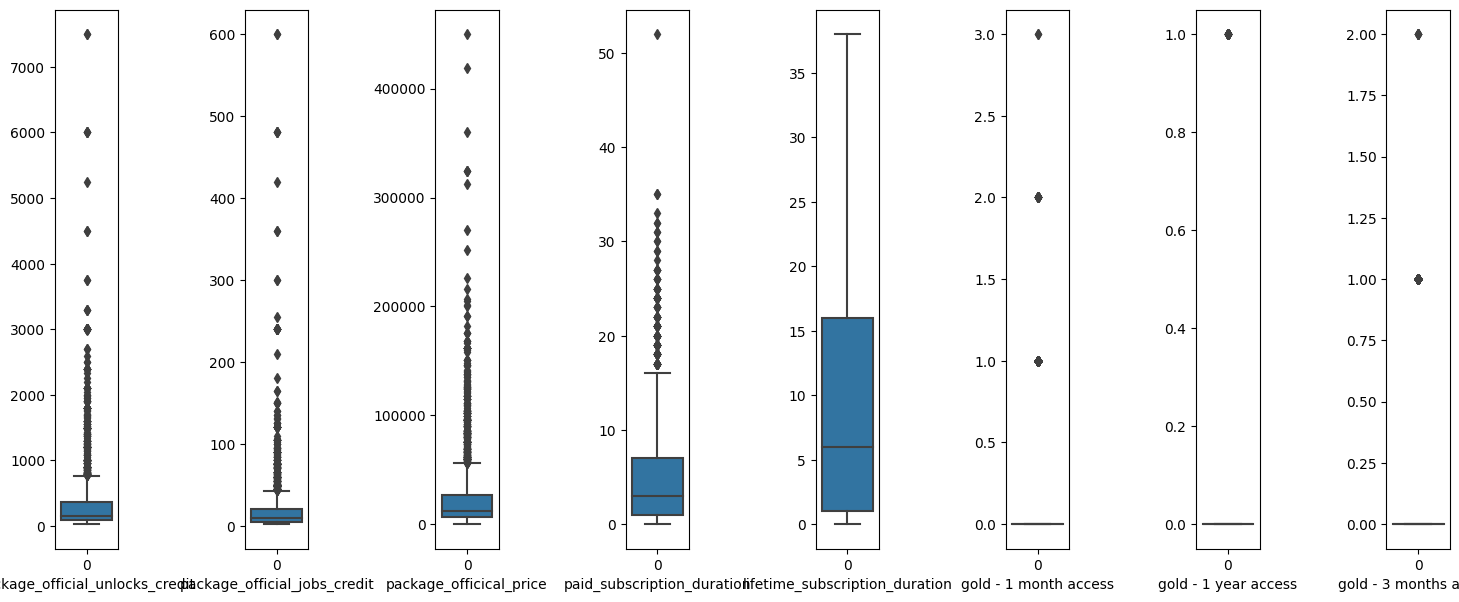

In [ ]:
f, axes = plt. subplots (1,8, figsize=(18, 7))
# creating 1 row and 9 columns
plt.subplots_adjust (wspace=2) # adjusting padding between subplots
# looping over all columns including the target
for idx, i in enumerate((client_dataset.columns[1:9])):
    sns.boxplot(client_dataset[i], ax=axes[idx])
    axes[idx].set_xlabel (i)


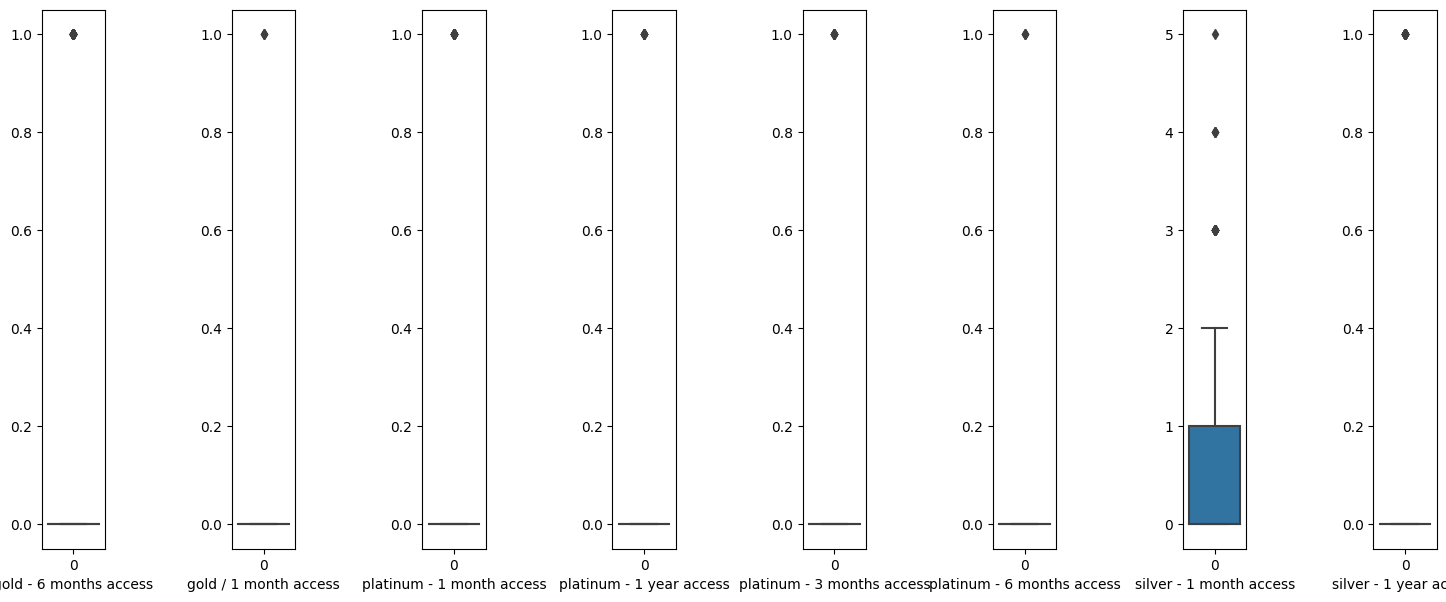

In [ ]:
f, axes = plt. subplots (1,8, figsize=(18, 7))
# creating 1 row and 9 columns
plt.subplots_adjust (wspace=2) # adjusting padding between subplots
# looping over all columns including the target
for idx, i in enumerate((client_dataset.columns[9:17])):
    sns.boxplot(client_dataset[i], ax=axes[idx])
    axes[idx].set_xlabel (i)


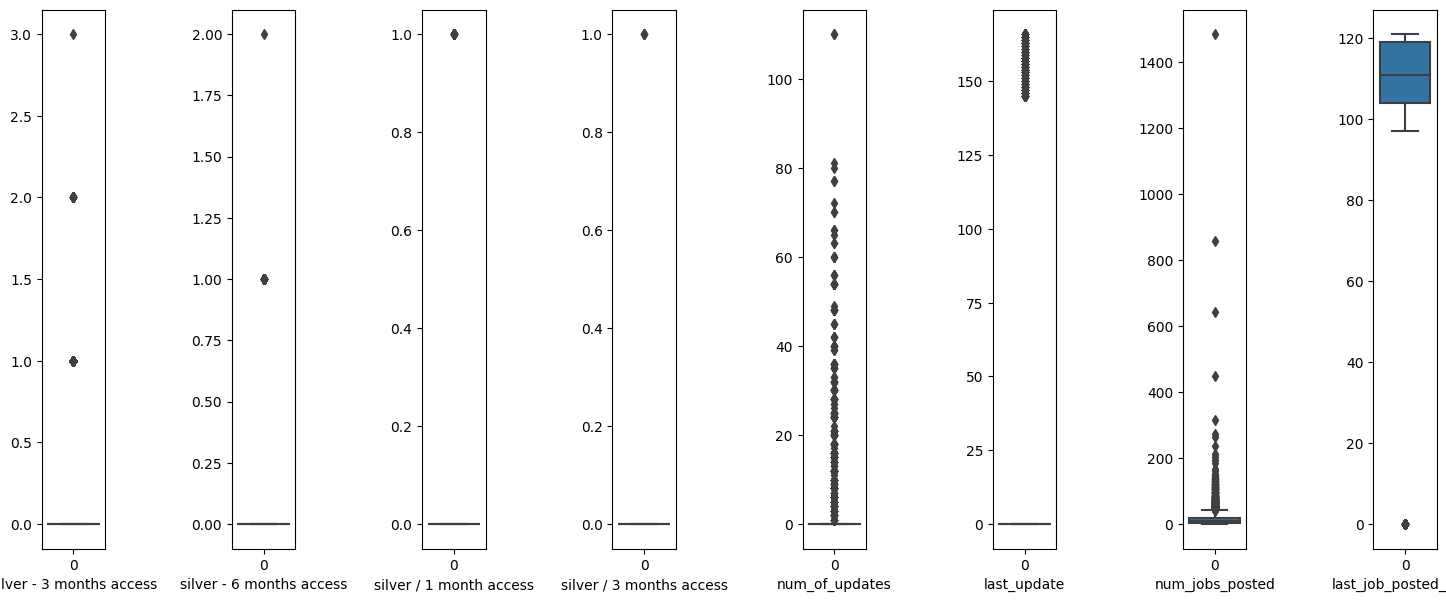

In [ ]:
f, axes = plt. subplots (1,8, figsize=(18, 7))
# creating 1 row and 9 columns
plt.subplots_adjust (wspace=2) # adjusting padding between subplots
# looping over all columns including the target
for idx, i in enumerate((client_dataset.columns[17:25])):
    sns.boxplot(client_dataset[i], ax=axes[idx])
    axes[idx].set_xlabel (i)


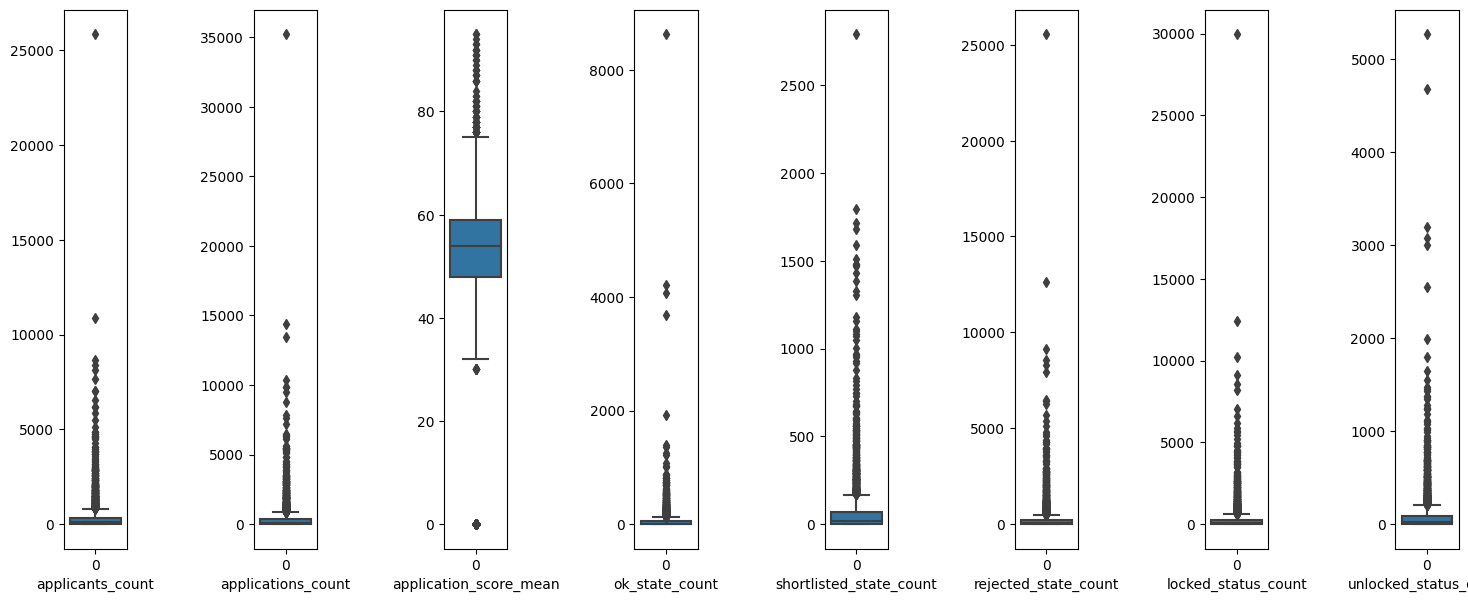

In [ ]:
f, axes = plt. subplots (1,8, figsize=(18, 7))
# creating 1 row and 9 columns
plt.subplots_adjust (wspace=2) # adjusting padding between subplots
# looping over all columns including the target
for idx, i in enumerate((client_dataset.columns[25:33])):
    sns.boxplot(client_dataset[i], ax=axes[idx])
    axes[idx].set_xlabel (i)


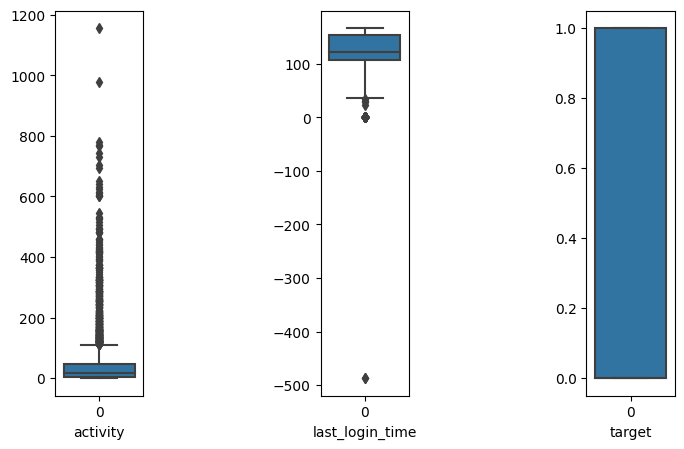

In [ ]:
f, axes = plt. subplots (1,3, figsize=(8, 5))
# creating 1 row and 9 columns
plt.subplots_adjust (wspace=2) # adjusting padding between subplots
# looping over all columns including the target
for idx, i in enumerate((client_dataset.columns[33:37])):
    sns.boxplot(client_dataset[i], ax=axes[idx])
    axes[idx].set_xlabel (i)


In [ ]:
values = client_dataset.target.value_counts()
values

0    2535
1    1161
Name: target, dtype: int64

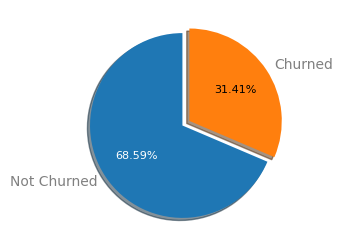

In [ ]:
values = client_dataset.target.value_counts()
labels = ['Not Churned', 'Churned']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

31.41% of the customers have churned and 68.59% haven't.



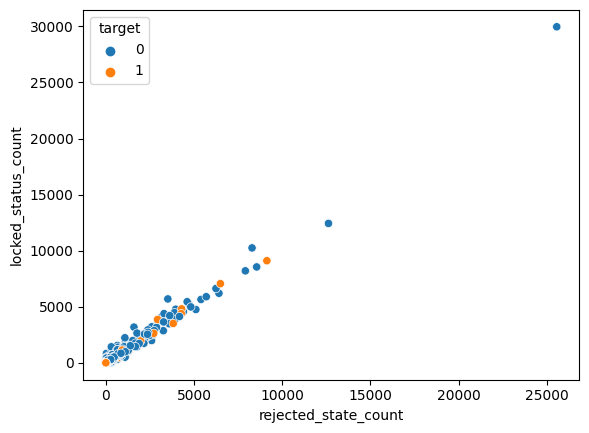

In [ ]:
sns.scatterplot(data=client_dataset,x="rejected_state_count",y="locked_status_count",hue="target")
plt.show()

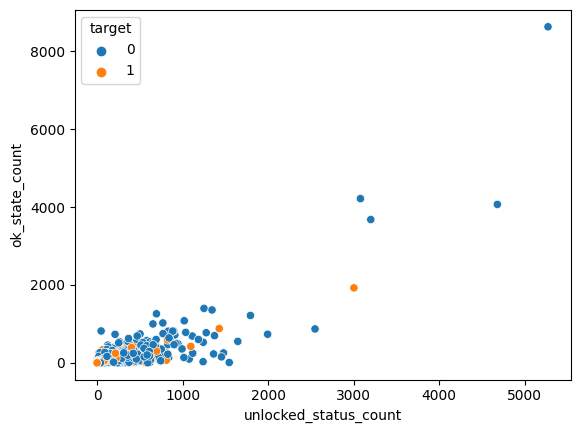

In [ ]:
sns.scatterplot(data=client_dataset,x="unlocked_status_count",y="ok_state_count",hue="target")
plt.show()

In [ ]:
#sns.pairplot(client_dataset, hue='target')

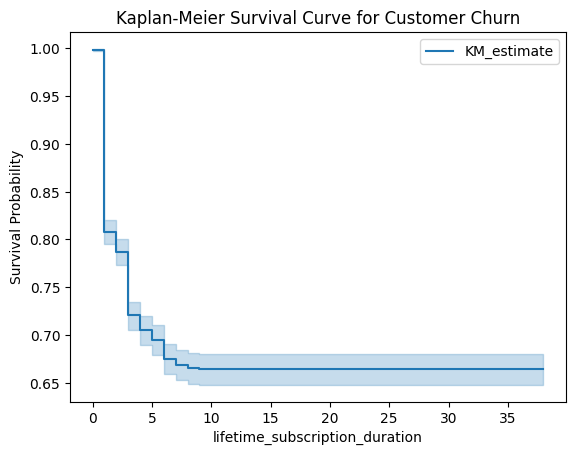

In [ ]:
kmf= KaplanMeierFitter()
kmf.fit(durations=client_dataset["lifetime_subscription_duration"],event_observed=client_dataset["target"])
kmf.plot()
plt.title("Kaplan-Meier Survival Curve for Customer Churn")
plt.xlabel("lifetime_subscription_duration")
plt.ylabel("Survival Probability")
plt.show()


<ipython-input-21-6f8c2695ef4c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = client_dataset.corr()


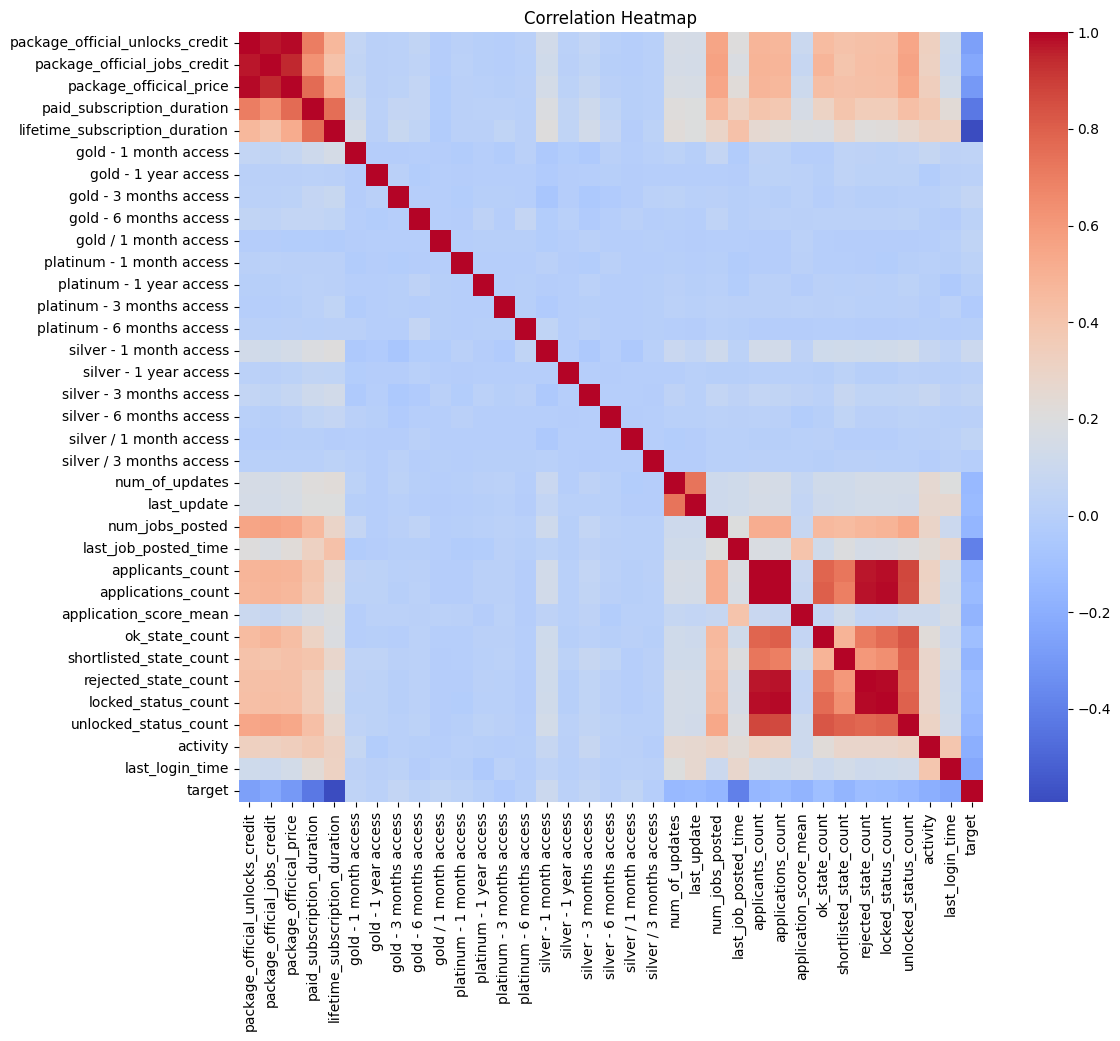

In [ ]:
# Correlation analysis
correlation_matrix = client_dataset.corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-22-d86baea5790c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  client_dataset.corr()['target'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

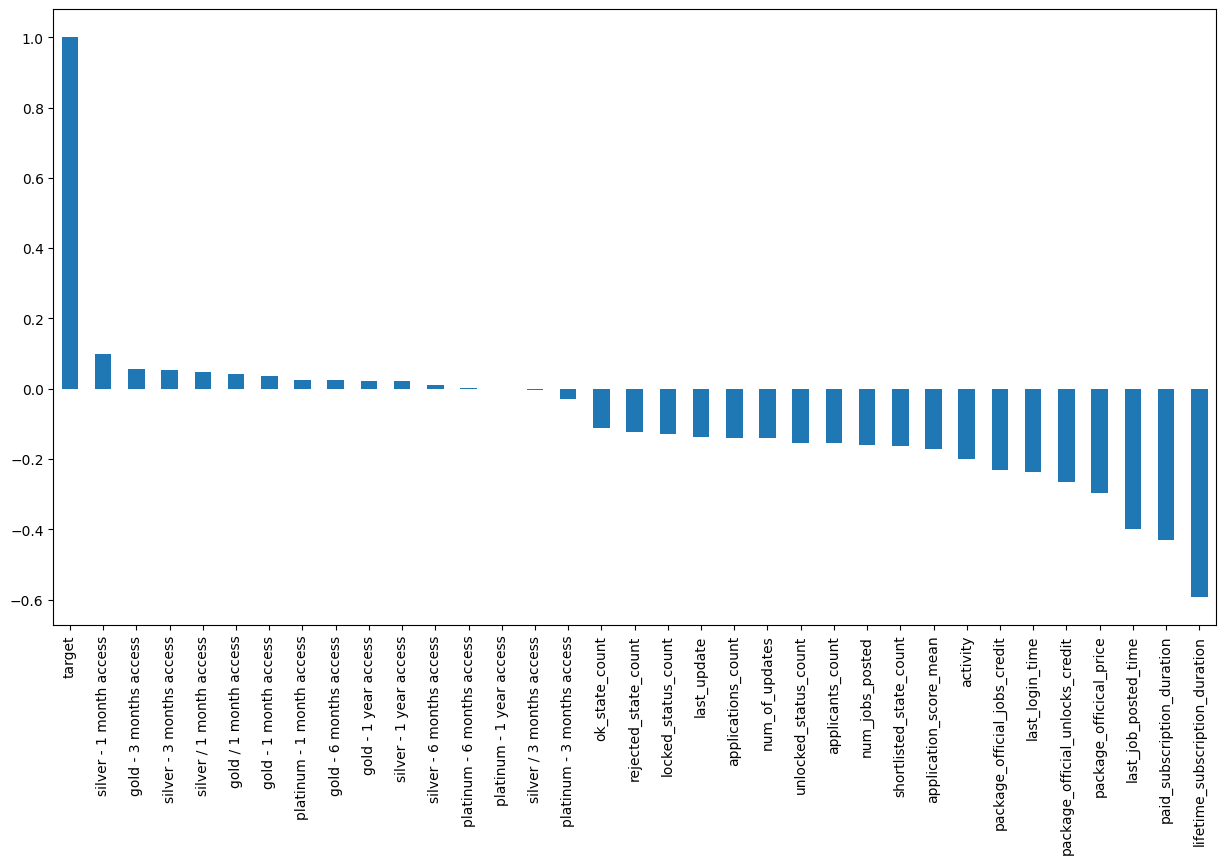

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
client_dataset.corr()['target'].sort_values(ascending = False).plot(kind='bar')

Observations

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a lifetime_subscription_duration reduces chances of churn. lifetime_subscription_duration along with paid_subscription_duration have the most negative relation with Churn.
Having DSL internet service also reduces the proability of Churn
Lastly, silver - 1 month access, gold - 1 month access, silver - 3 months access and silver - 1 month access can lead to higher churn rates.

In [ ]:
client_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
package_official_unlocks_credit,3696.0,324.039502,522.661967,30.0,90.0,150.0,360.00,7500.0
package_official_jobs_credit,3696.0,19.065206,34.925032,2.0,5.0,10.0,20.00,600.0
package_officical_price,3696.0,22507.226732,32313.062650,250.0,7000.0,12000.0,26625.00,450000.0
paid_subscription_duration,3696.0,5.265152,5.403055,0.0,1.0,3.0,7.00,52.0
lifetime_subscription_duration,3696.0,9.245942,8.189624,0.0,1.0,6.0,16.00,38.0
gold - 1 month access,3696.0,0.141234,0.371617,0.0,0.0,0.0,0.00,3.0
gold - 1 year access,3696.0,0.012716,0.112063,0.0,0.0,0.0,0.00,1.0
gold - 3 months access,3696.0,0.079545,0.276560,0.0,0.0,0.0,0.00,2.0
gold - 6 months access,3696.0,0.020022,0.140093,0.0,0.0,0.0,0.00,1.0
gold / 1 month access,3696.0,0.000812,0.028482,0.0,0.0,0.0,0.00,1.0



# Data Preprocessing#

In [ ]:
#in last_login_time column there are negative values (-487) which should not to be case there Is no negative expecince last_login_time.
client_dataset["last_login_time"][client_dataset["last_login_time"]<0]=client_dataset["last_login_time"].mean()


<ipython-input-24-62ec93426a5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_dataset["last_login_time"][client_dataset["last_login_time"]<0]=client_dataset["last_login_time"].mean()


In [ ]:
client_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
package_official_unlocks_credit,3696.0,324.039502,522.661967,30.0,90.0,150.0,360.00,7500.0
package_official_jobs_credit,3696.0,19.065206,34.925032,2.0,5.0,10.0,20.00,600.0
package_officical_price,3696.0,22507.226732,32313.062650,250.0,7000.0,12000.0,26625.00,450000.0
paid_subscription_duration,3696.0,5.265152,5.403055,0.0,1.0,3.0,7.00,52.0
lifetime_subscription_duration,3696.0,9.245942,8.189624,0.0,1.0,6.0,16.00,38.0
gold - 1 month access,3696.0,0.141234,0.371617,0.0,0.0,0.0,0.00,3.0
gold - 1 year access,3696.0,0.012716,0.112063,0.0,0.0,0.0,0.00,1.0
gold - 3 months access,3696.0,0.079545,0.276560,0.0,0.0,0.0,0.00,2.0
gold - 6 months access,3696.0,0.020022,0.140093,0.0,0.0,0.0,0.00,1.0
gold / 1 month access,3696.0,0.000812,0.028482,0.0,0.0,0.0,0.00,1.0


In [ ]:
#Remove customer IDs from the data set
client_dataset.drop(["company_id"], axis=1, inplace = True)

In [ ]:
client_dataset.head()



,package_official_unlocks_credit,package_official_jobs_credit,package_officical_price,paid_subscription_duration,lifetime_subscription_duration,gold - 1 month access,gold - 1 year access,gold - 3 months access,gold - 6 months access,gold / 1 month access,...,applications_count,application_score_mean,ok_state_count,shortlisted_state_count,rejected_state_count,locked_status_count,unlocked_status_count,activity,last_login_time,target
0,800,40,54950,8,24,0,0,0,0,0,...,28,52,9,5,14,14,14,13,123.0,0
1,30,2,2500,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,103.0,1
2,30,2,2500,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
3,1200,60,79800,12,15,0,0,0,0,0,...,252,55,129,102,21,99,153,33,133.0,0
4,30,2,2500,1,1,0,0,0,0,0,...,149,45,28,34,87,110,39,15,135.0,1


In [ ]:
dataset_features = client_dataset.drop(["target"], axis=1)

dataset_labels = client_dataset["target"]


#Spliting the Data#

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(dataset_features, dataset_labels, test_size=0.2, random_state=21)


#Scaling data#

In [ ]:
scaler = preprocessing.StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

#Modeling#

##LGBM##

###Basic Model###

In [ ]:
# build the lightgbm model
clf = lgb.LGBMClassifier()
clf.fit(train_features, train_labels)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 912, number of negative: 2044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 2956, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.308525 -> initscore=-0.807024
[LightGBM] [Info] Start training from score -0.807024


LGBMClassifier()

In [ ]:
# predict the results
LGBM_label_pred=clf.predict(test_features)

In [ ]:
# view accuracy
LGBM_accuracy=accuracy_score(LGBM_label_pred, test_labels)
print('LGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, LGBM_label_pred)))

LGBM Model accuracy score: 0.9568


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       491
           1       0.94      0.93      0.94       249

    accuracy                           0.96       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.96      0.96      0.96       740

LGBM F1 score: 0.935483870967742


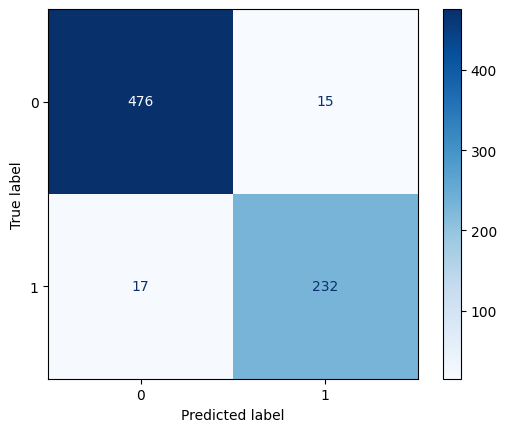

In [ ]:
print(classification_report(test_labels, LGBM_label_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, LGBM_label_pred, cmap='Blues')
plt.grid(False)
# save the value in a variable for later comparison with the rest of the models
LGBM_fscore = f1_score(test_labels, LGBM_label_pred)
print('LGBM F1 score:', LGBM_fscore)


In [ ]:
# Calculate the AUC
LGBM_auc0 = roc_auc_score(test_labels, LGBM_label_pred)
print("Area under the curve (AUC):", LGBM_auc0)

Area under the curve (AUC): 0.9505885047317579


###Feature importance###

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 912, number of negative: 2044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 2956, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.308525 -> initscore=-0.807024
[LightGBM] [Info] Start training from score -0.807024
                                 importance
lifetime_subscription_duration          330
last_login_time                         284
last_job_posted_time                    265
num_jobs_posted                         238
activity                                225
application_score_mean                  165
shortlisted_state_count                 164
unlocked_statu

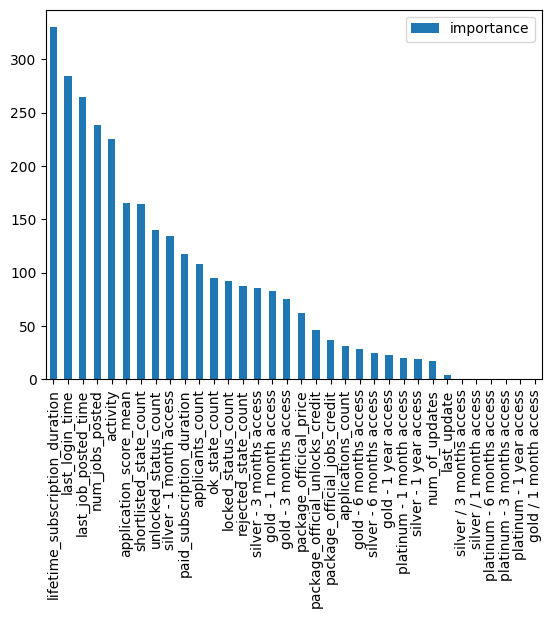

In [ ]:
clf = lgb.LGBMClassifier()
clf.fit(train_features, train_labels)

importance = pd.DataFrame(clf.feature_importances_, index=train_features.columns, columns=['importance'])
print(importance.sort_values(by='importance', ascending=False))  # sorting in descending order
importance.nlargest(35, 'importance').plot(kind='bar');

In [ ]:
train_features_imp = train_features.drop(["num_of_updates", "last_update"], axis=1)
test_features_imp = test_features.drop(["num_of_updates", "last_update"], axis=1)

In [ ]:
# build the lightgbm model
clf = lgb.LGBMClassifier()
clf.fit(train_features_imp, train_labels)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 912, number of negative: 2044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2797
[LightGBM] [Info] Number of data points in the train set: 2956, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.308525 -> initscore=-0.807024
[LightGBM] [Info] Start training from score -0.807024


LGBMClassifier()

In [ ]:
# predict the results
label_imp_pred=clf.predict(test_features_imp)

In [ ]:
# view accuracy
LGBM_imp_accuracy=accuracy_score(label_imp_pred, test_labels)
print('LGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, label_imp_pred)))

LGBM Model accuracy score: 0.9595


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       491
           1       0.95      0.93      0.94       249

    accuracy                           0.96       740
   macro avg       0.96      0.95      0.95       740
weighted avg       0.96      0.96      0.96       740

LGBM F1 score: 0.9392712550607287


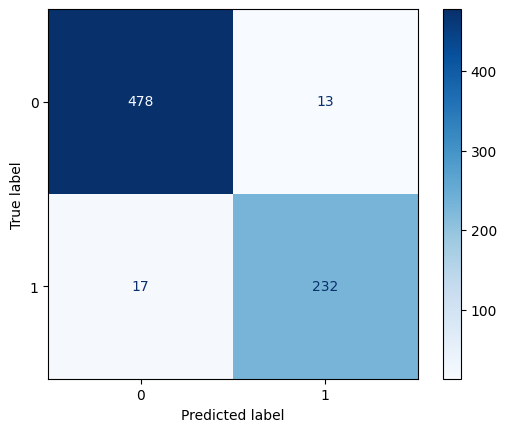

In [ ]:
print(classification_report(test_labels, label_imp_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, label_imp_pred, cmap='Blues')
plt.grid(False)
# save the value in a variable for later comparison with the rest of the models
LGBM_imp_fscore = f1_score(test_labels, label_imp_pred)
print('LGBM F1 score:', LGBM_imp_fscore)

###hyper parameter###

In [ ]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
clf = lgb.LGBMClassifier()
# Create the GridSearchCV object
grid = GridSearchCV(clf, param_grid, n_jobs=1, cv=3, scoring='accuracy', verbose=1, refit=True)
# Fit the GridSearchCV object to the data
grid.fit(train_features, train_labels)


# Print the best parameters found by GridSearchCV
print(grid.best_params_)
print(grid.best_score_)
label_gred_pred=grid.predict(test_features)
print('Accuracy of LGBM classifier on training set: {:.2f}'
        .format(grid.score(train_features, train_labels)))
print('Accuracy of LGBM classifier on test set: {:.2f}'
     .format(grid.score(test_features, test_labels)))
print(confusion_matrix(test_labels, label_gred_pred))
print(classification_report(test_labels, label_gred_pred));
LGBM_gred_fscore = f1_score(test_labels, label_gred_pred)
# view accuracy
LGBM_imp_gred_accuracy=accuracy_score(label_gred_pred, test_labels)
print('LGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, label_gred_pred)))


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# Calculate the AUC
LGBM_auc = roc_auc_score(test_labels, label_gred_pred)
print("Area under the curve (AUC):", LGBM_auc)


##Random Forest##



###Basic Model###

In [ ]:
#The following script trains the model using Random Forest algorithm:

rfc_object = rfc(n_estimators=200, random_state=0)

rfc_object.fit(train_features, train_labels)

RF_label_pred = rfc_object.predict(test_features)

In [ ]:
print(classification_report(test_labels, RF_label_pred))

print(confusion_matrix(test_labels, RF_label_pred))

# view accuracy
RF_accuracy=accuracy_score(RF_label_pred, test_labels)
print('RF Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, RF_label_pred)))


In [ ]:
print(classification_report(test_labels, RF_label_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, RF_label_pred, cmap='Blues')
plt.grid(False)
# save the value in a variable for later comparison with the rest of the models
RF_fscore = f1_score(test_labels, RF_label_pred)
print('Random Forest F1 score:', RF_fscore)


In [ ]:
# Calculate the AUC
RF_auc0 = roc_auc_score(test_labels, RF_label_pred)
print("Area under the curve (AUC):", RF_auc0)

###hyper parameter###

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42],
    'oob_score': [True, False]
}
# Create an instance of the MLPClassifier

# Create the GridSearchCV object
grid = GridSearchCV(rfc(), param_grid, n_jobs=1, cv=3, scoring='accuracy', verbose=1, refit=True)

# Fit the GridSearchCV object to the data
grid.fit(train_features, train_labels)

# Print the best parameters found by GridSearchCV
print(grid.best_params_)
print(grid.best_score_)
label_gred_pred =grid.predict(test_features)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
        .format(grid.score(train_features, train_labels)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
        .format(grid.score(test_features, test_labels)))
print(confusion_matrix(test_labels, label_gred_pred))
print(classification_report(test_labels, label_gred_pred));
RF_gred_fscore = f1_score(test_labels, label_gred_pred)
# view accuracy
RF_gred_accuracy=accuracy_score(label_gred_pred, test_labels)
print('LGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, label_gred_pred)))

In [ ]:
# Calculate the AUC
RF_auc = roc_auc_score(test_labels, label_gred_pred)
print("Area under the curve (AUC):", RF_auc)

##XGBoost##

###Basic Model###

In [ ]:
num_classes = len(set(train_labels))  # Assuming train_labels is the array of labels
clf = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective="multi:softmax", booster="gbtree", num_class=num_classes)
clf.fit(train_features, train_labels, eval_set=[(test_features, test_labels)], eval_metric="mlogloss", early_stopping_rounds=10)


In [ ]:
XGB_label_pred = clf.predict(test_features)
XGB_accuracy = accuracy_score(test_labels, XGB_label_pred)
print(f"Accuracy: {XGB_accuracy:.2f}")


In [ ]:
print(classification_report(test_labels, XGB_label_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, XGB_label_pred, cmap='Blues')
plt.grid(False)
# save the value in a variable for later comparison with the rest of the models
XGB_fscore = f1_score(test_labels, XGB_label_pred)
print('XGBoost F1 score:', XGB_fscore)


In [ ]:
# Calculate the AUC
XGB_auc0 = roc_auc_score(test_labels, XGB_label_pred)
print("Area under the curve (AUC):", XGB_auc0)

###hyper parameter###

In [ ]:
# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.05, 0.10, 0.20],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

# Create the GridSearchCV object
grid = GridSearchCV(XGBClassifier(), param_grid, n_jobs=1, cv=10, scoring='accuracy', verbose=1, refit=True)

# Fit the GridSearchCV object to the data
grid.fit(train_features, train_labels)

# Print the best parameters found by GridSearchCV
print(grid.best_params_)
print(grid.best_score_)
label_gred_pred =grid.predict(test_features)
print('Accuracy of XGBoost classifier on training set: {:.2f}'
        .format(grid.score(train_features, train_labels)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
        .format(grid.score(test_features, test_labels)))
print(confusion_matrix(test_labels, label_gred_pred))
print(classification_report(test_labels, label_gred_pred));
XGB_gred_fscore = f1_score(test_labels, label_gred_pred)
# view accuracy
XGB_gred_accuracy=accuracy_score(label_gred_pred, test_labels)
print('LGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, label_gred_pred)))

In [ ]:
# Calculate the AUC
XGB_auc = roc_auc_score(test_labels, label_gred_pred)
print("Area under the curve (AUC):", XGB_auc)

##Support Vector Machines##

###Basic Model###

In [ ]:
svm_object = svm(kernel="rbf", degree=8)

svm_object.fit(train_features, train_labels)

SVM_label_pred = svm_object.predict(test_features)

In [ ]:
# view accuracy
SVM_accuracy=accuracy_score(SVM_label_pred, test_labels)
print('SVM Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, SVM_label_pred)))

In [ ]:
print(classification_report(test_labels, SVM_label_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, SVM_label_pred, cmap='Blues')
plt.grid(False)
# save the value in a variable for later comparison with the rest of the models
SVM_fscore = f1_score(test_labels, SVM_label_pred)
print('SVM F1 score:', SVM_fscore)

In [ ]:
# Calculate the AUC
SVM_auc0 = roc_auc_score(test_labels, SVM_label_pred)
print("Area under the curve (AUC):", SVM_auc0)

###hyper parameter###

In [ ]:
# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

# Create the GridSearchCV object
grid = GridSearchCV(svm(), param_grid, refit=True, verbose=3)

# Fit the GridSearchCV object to the data
grid.fit(train_features, train_labels)

# Print the best parameters found by GridSearchCV
print(grid.best_params_)
print(grid.best_score_)
label_gred_pred=grid.predict(test_features)
print('Accuracy of SVM classifier on training set: {:.2f}'
        .format(grid.score(train_features, train_labels)))
print('Accuracy of SVM classifier on test set: {:.2f}'
        .format(grid.score(test_features, test_labels)))
print(confusion_matrix(test_labels, label_gred_pred))
print(classification_report(test_labels, label_gred_pred));
SVM_gred_fscore = f1_score(test_labels, label_gred_pred)
# view accuracy
SVM_gred_accuracy=accuracy_score(label_gred_pred, test_labels)
print('SVM Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, label_gred_pred)))


In [ ]:
#Calculate the AUC.
SVM_auc = roc_auc_score(test_labels, label_gred_pred)
print("Area under the curve (AUC):", SVM_auc)

##Logistic Regression##


###Basic Model###

In [ ]:
lr_object = LogisticRegression()

lr_object.fit(train_features, train_labels)
label_pred = lr_object.predict(test_features)

In [ ]:
# view accuracy
LR_accuracy=accuracy_score(label_pred, test_labels)
print('LR Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, label_pred)))

In [ ]:
print(classification_report(test_labels, label_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, label_pred, cmap='Blues')
plt.grid(False)
# save the value in a variable for later comparison with the rest of the models
LR_fscore = f1_score(test_labels, label_pred)
print('Logistic Regression F1 score:', LR_fscore)

In [ ]:
# Calculate the AUC
LR_auc0 = roc_auc_score(test_labels, label_pred)
print("Area under the curve (AUC):", LR_auc0)

###hyper parameter###

In [ ]:
# Hyperparameter tuning
rfc_object = rfc()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(estimator=rfc_object, param_grid=param_grid, cv= 5)
grid.fit(train_features, train_labels)
print(grid.best_params_)
print(grid.best_score_)
LR_label_gred_pred =grid.predict(test_features)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
        .format(grid.score(train_features, train_labels)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
        .format(grid.score(test_features, test_labels)))
print(confusion_matrix(test_labels, LR_label_gred_pred))
print(classification_report(test_labels, LR_label_gred_pred));
LR_gred_fscore = f1_score(test_labels, label_gred_pred)
# view accuracy
LR_gred_accuracy=accuracy_score(LR_label_gred_pred, test_labels)
print('LR Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, LR_label_gred_pred)))

In [ ]:
# Calculate the AUC
LR_auc = roc_auc_score(test_labels, LR_label_gred_pred)
print("Area under the curve (AUC):", LR_auc)

##KNN##

###Basic Model###

In [ ]:
# Create an instance of the KNeighborsClassifier class
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(train_features_scaled, train_labels)

# Make predictions on new data
KNN_label_scaled_pred = knn.predict(test_features_scaled)

In [ ]:
# view accuracy
KNN_accuracy=accuracy_score(KNN_label_scaled_pred, test_labels)
print('LR Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, KNN_label_scaled_pred)))

In [ ]:
print(classification_report(test_labels, KNN_label_scaled_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, KNN_label_scaled_pred, cmap='Blues')
plt.grid(False)
# save the value in a variable for later comparison with the rest of the models
KNN_asc_fscore = f1_score(test_labels, KNN_label_scaled_pred)
print('KNN F1 score:', KNN_asc_fscore)

In [ ]:
# Calculate the AUC
KNN_auc0 = roc_auc_score(test_labels, KNN_label_scaled_pred)
print("Area under the curve (AUC):", KNN_auc0)

###hyper parameter###

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold

# Define the model and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Define the parameter grid
param_grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)

# Create the GridSearchCV object
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid.fit(train_features_scaled, train_labels)

# Print the best parameters found by GridSearchCV
print(grid.best_params_)
print(grid.best_score_)
KNN_label_scaled_gred_pred=grid.predict(test_features_scaled)
print('Accuracy of KNN classifier on training set: {:.2f}'
        .format(grid.score(train_features_scaled, train_labels)))
print('Accuracy of KNN classifier on test set: {:.2f}'
        .format(grid.score(test_features_scaled, test_labels)))
print(confusion_matrix(test_labels, KNN_label_scaled_gred_pred))
print(classification_report(test_labels, KNN_label_scaled_gred_pred));
KNN_gred_fscore = f1_score(test_labels, label_gred_pred)
# view accuracy
KNN_gred_accuracy=accuracy_score(KNN_label_scaled_pred, test_labels)
print('LR Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, KNN_label_scaled_pred)))

In [ ]:
# Calculate the AUC
KNN_auc = roc_auc_score(test_labels, KNN_label_scaled_gred_pred)
print("Area under the curve (AUC):", KNN_auc)

##Decision Tree##

In [ ]:
# Create an instance of the DecisionTreeClassifier class
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(train_features, train_labels)

# Make predictions on the test data
DT_label_pred = dt.predict(test_features)


In [ ]:
# view accuracy
DT_accuracy=accuracy_score(DT_label_pred, test_labels)
print('DT Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, DT_label_pred)))

In [ ]:
print(classification_report(test_labels, DT_label_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, DT_label_pred, cmap='Blues')
plt.grid(False)
# save the value in a variable for later comparison with the rest of the models
DT_fscore = f1_score(test_labels, DT_label_pred)
print('Decision Tree F1 score:', DT_fscore)

In [ ]:
# Calculate the AUC
DT_auc0 = roc_auc_score(test_labels, DT_label_pred)
print("Area under the curve (AUC):", DT_auc0)

###hyper parameter###

In [ ]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=1, cv=3, scoring='accuracy', verbose=1, refit=True)

# Fit the GridSearchCV object to the data
grid.fit(train_features, train_labels)
# Print the best parameters found by GridSearchCV
print(grid.best_params_)
print(grid.best_score_)
DT_label_gred_pred =grid.predict(test_features)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
        .format(grid.score(train_features, train_labels)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
        .format(grid.score(test_features, test_labels)))
print(confusion_matrix(test_labels, DT_label_gred_pred))
print(classification_report(test_labels, DT_label_gred_pred));
DT_gred_fscore = f1_score(test_labels, label_gred_pred)
# view accuracy
DT_gred_accuracy=accuracy_score(DT_label_gred_pred, test_labels)
print('DT Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, DT_label_gred_pred)))

In [ ]:
# Calculate the AUC
DT_auc = roc_auc_score(test_labels, DT_label_gred_pred)
print("Area under the curve (AUC):", DT_auc)

##Naïve Bayes##

###Basic Model###

In [ ]:
# Importing the necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


# Creating a Naïve Bayes classifier
model = GaussianNB()

# Training the model
model.fit(train_features, train_labels)

# Making predictions
NB_label_pred = model.predict(test_features)

In [ ]:
# view accuracy
NB_accuracy=accuracy_score(NB_label_pred, test_labels)
print('Naïve Bayes Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, NB_label_pred)))

In [ ]:
print(classification_report(test_labels, NB_label_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, NB_label_pred, cmap='Blues')
plt.grid(False)
# save the value in a variable for later comparison with the rest of the models
NB_fscore = f1_score(test_labels, NB_label_pred)
print('Naïve Bayes F1 score:', NB_fscore)

In [ ]:
# Calculate the AUC
NB_auc0 = roc_auc_score(test_labels, NB_label_pred)
print("Area under the curve (AUC):", NB_auc0)

###hyper parameter###

In [ ]:
# Define the parameter grid to search
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Create the GridSearchCV object
grid = GridSearchCV(GaussianNB(), param_grid_nb, n_jobs=1, cv=3, scoring='accuracy', verbose=1, refit=True)


# Fit the GridSearchCV object to the data
grid.fit(train_features, train_labels)
# Print the best parameters found by GridSearchCV
print(grid.best_params_)
print(grid.best_score_)
NB_label_gred_pred =grid.predict(test_features)
print('Accuracy of Naïve Bayes classifier on training set: {:.2f}'
        .format(grid.score(train_features, train_labels)))
print('Accuracy of Naïve Bayes classifier on test set: {:.2f}'
        .format(grid.score(test_features, test_labels)))
print(confusion_matrix(test_labels, NB_label_gred_pred))
print(classification_report(test_labels, NB_label_gred_pred));
NB_gred_fscore = f1_score(test_labels, label_gred_pred)
# view accuracy
NB_gred_accuracy=accuracy_score(NB_label_gred_pred, test_labels)
print('Naïve Bayes Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, NB_label_gred_pred)))

In [ ]:
# Calculate the AUC
NB_auc = roc_auc_score(test_labels, NB_label_gred_pred)
print("Area under the curve (AUC):", NB_auc)

##ANN##

###Basic Model###

In [ ]:
# Initialize the ANN
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=dataset_features.shape[1]))

# Add the second hidden layer
model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Add the output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the ANN to the training set
model.fit(train_features, train_labels, batch_size=32, epochs=100)

# Predict the test set results
ANN_label_pred = model.predict(test_features)


In [ ]:
# Convert to binary format using a threshold (e.g., 0.5)
threshold = 0.5
ANN_label_pred_binary = (ANN_label_pred > threshold).astype(int)

In [ ]:
# view accuracy
ANN_accuracy=accuracy_score(ANN_label_pred_binary, test_labels)
print('ANN Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, ANN_label_pred_binary)))

In [ ]:
print(classification_report(test_labels, ANN_label_pred_binary))
ConfusionMatrixDisplay.from_predictions(test_labels, ANN_label_pred_binary, cmap='Blues')
plt.grid(False)
# save the value in a variable for later comparison with the rest of the models
ANN_fscore = f1_score(test_labels, ANN_label_pred_binary)
print('ANN F1 score:', ANN_fscore)

In [ ]:
# Calculate the AUC
ANN_auc0 = roc_auc_score(test_labels, ANN_label_pred_binary)
print("Area under the curve (AUC):", ANN_auc0)

###hyper parameter###

In [ ]:
# Define the parameter grid to search
param_grid = {
   'hidden_layers': [[50], [100], [150]],
   'neurons': [[10], [20], [30]],
   'learning_rate': [0.001, 0.01, 0.1],
   'batch_size': [10, 20, 30],
   'epochs': [10, 50, 100]
}


# Create the GridSearchCV object
grid = GridSearchCV(GaussianNB(), param_grid_nb, n_jobs=1, cv=3, scoring='accuracy', verbose=1, refit=True)


# Fit the GridSearchCV object to the data
grid.fit(train_features, train_labels)
# Print the best parameters found by GridSearchCV
print(grid.best_params_)
print(grid.best_score_)
ANN_label_gred_pred =grid.predict(test_features)
print('Accuracy of Naïve Bayes classifier on training set: {:.2f}'
        .format(grid.score(train_features, train_labels)))
print('Accuracy of Naïve Bayes classifier on test set: {:.2f}'
        .format(grid.score(test_features, test_labels)))
print(confusion_matrix(test_labels, ANN_label_gred_pred))
print(classification_report(test_labels, ANN_label_gred_pred));
ANN_gred_fscore = f1_score(test_labels, label_gred_pred)
# view accuracy
ANN_gred_accuracy=accuracy_score(ANN_label_gred_pred, test_labels)
print('ANN Model accuracy score: {0:0.4f}'.format(accuracy_score(test_labels, ANN_label_gred_pred)))

In [ ]:
# Calculate the AUC
ANN_auc = roc_auc_score(test_labels, ANN_label_gred_pred)
print("Area under the curve (AUC):", ANN_auc)

#Summary#

In [ ]:
summary_1 = {
    'Models': ['LGBM', 'Random Forest', 'XGBoost', 'Support Vector Machines', 'Logistic Regression', 'KNN','Decision Tree' ,'Naïve Bayes','ANN'],
    'F1 Score (Churn)': [LGBM_fscore, RF_fscore, XGB_fscore, SVM_fscore, LR_fscore, KNN_asc_fscore,DT_fscore,NB_fscore,ANN_fscore],
    'Accuracy ': [LGBM_accuracy, RF_accuracy, XGB_accuracy, SVM_accuracy, LR_accuracy, KNN_accuracy, DT_accuracy, NB_accuracy, ANN_accuracy],
    'AUC ':[LGBM_auc0, RF_auc0, XGB_auc0, SVM_auc0, LR_auc0, KNN_auc0, DT_auc0, NB_auc0, ANN_auc0 ]
             }

df_summary_1 = pd.DataFrame(summary_1)
df_summary_1

In [ ]:
from matplotlib import pyplot as plt
df_summary_1['Accuracy '].plot(kind='line', figsize=(8, 4), title='Accuracy ')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
summary_2 = {
    'Models': ['LGBM', 'Random Forest', 'XGBoost', 'Support Vector Machines', 'Logistic Regression', 'KNN','Decision Tree' ,'Naïve Bayes','ANN'],
    'F1 Score (Churn)': [LGBM_gred_fscore, RF_gred_fscore, XGB_gred_fscore, SVM_gred_fscore, LR_gred_fscore, KNN_gred_fscore, DT_gred_fscore, NB_gred_fscore, ANN_gred_fscore ],
    'Accuracy ': [LGBM_imp_gred_accuracy, RF_gred_accuracy, XGB_gred_accuracy, SVM_gred_accuracy, LR_gred_accuracy, KNN_gred_accuracy, DT_gred_accuracy, NB_gred_accuracy, ANN_gred_accuracy],
    'AUC ':[LGBM_auc, RF_auc, XGB_auc, SVM_auc, LR_auc, KNN_auc, DT_auc, NB_auc, ANN_auc ]
             }

df_summary_2 = pd.DataFrame(summary_2)
df_summary_2

In [ ]:
from matplotlib import pyplot as plt
df_summary_2['Accuracy '].plot(kind='line', figsize=(8, 4), title='Accuracy ')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Plot ROC curve
plt. figure (figsize=(10,8))
plt.plot([0, 1], [0, 1], "k--")
plt.plot (fpr_SVM, tpr_SVM, label='SVM (area = X0.3f)' % roc_auc_SVM)
plt.plot(fpr_NB, tpr_NB, label='NB (area = %0.3f)' % roc_auc_NB)
plt.plot (fpr_DTC, tpr_DTC, label='DTC (area = %0.3f)' % roc_auc_DTC)
plt.plot (fpr_KNN, tpr_KNN, label= 'KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot (fpr_AB, tpr_AB, label= 'AB (area = 0.3f)' % roc_auc_AB)
plt.plot (fpr_LR, tpr_LR, label='LR (area = %0.31)' % roc_auc_LR)
plt.xlabel ('False Positive Rate')
plt.ylabel('True Positive Rate')
plt. title('ROC Curves', fontsize=16)
plt. Legend (loc='best', fontsize=10)
plt. show()